Step 1: Import Libraries and Load Data

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv('train_data.txt', sep=',', on_bad_lines='skip')

# Inspecting the first few rows of the dataset
print(data.head())

# Inspecting the dataset columns
print(data.columns)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents  \
0  2 ::: Cupid (1997) ::: thriller ::: A brother ...                                                               
1                                        3 ::: Young                                                               
2  5 ::: The Unrecovered (2007) ::: drama ::: The...                                                               
3  7 ::: "Pink Slip" (2009) ::: comedy ::: In tou...                                                               
4  8 ::: One Step Away (1985) ::: crime ::: Ron P...                                                               

   10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious  \
0                                                NaN                                                            
1   Wild and Wonderful (1980) ::: adult ::: As th...                         

Step 2: Load and Explore the Data

In [10]:
# Sample data structure
data = {
    'plot_summary': [
        "Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.",
        "Aibileen is a black maid in 1960s Jackson, Mississippi, who's always taken care of white children. She's always wanted to be a writer, and with the help of Skeeter, a recent college grad who wants to be a serious journalist, Aibileen writes about her experiences as a maid. Minny, Aibileen's best friend, is also a maid, but she can't keep a job because of her outspokenness. When Minny finally finds work with Celia Foote, a sweet simple woman ostracized by the high society ladies, she helps Celia navigate her new life and her difficult marriage.",
        "In 1950s Baltimore, a fat teenager dreams of appearing on a local TV dance show. Along the way, she becomes involved in the fight to integrate the show."
    ],
    'genre': ['drama', 'drama', 'comedy']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Check for missing values
print(df.isnull().sum())


plot_summary    0
genre           0
dtype: int64


Step 3: Data Preprocessing

In [11]:
# Text Cleaning and LemmatizationText Cleaning and Lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['cleaned_plot'] = df['plot_summary'].apply(preprocess_text)
print(df.head())


                                        plot_summary   genre  \
0  Listening in to a conversation between his doc...   drama   
1  Aibileen is a black maid in 1960s Jackson, Mis...   drama   
2  In 1950s Baltimore, a fat teenager dreams of a...  comedy   

                                        cleaned_plot  
0  listening conversation doctor parent oscar lea...  
1  aibileen black maid jackson mississippi always...  
2  baltimore fat teenager dream appearing local t...  


Step 4: Feature Extraction using TF-IDF

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_plot']).toarray()
y = df['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 5: Model Building and Evaluation

Naive Bayes Classifier

In [13]:
# Initialize and train the model
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_clf.predict(X_test)

# Evaluate the model
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance:
Accuracy: 0.0
[[0 0]
 [1 0]]
              precision    recall  f1-score   support

      comedy       0.00      0.00      0.00       0.0
       drama       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Logistic Regression

In [14]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Performance:
Accuracy: 1.0
[[1]]
              precision    recall  f1-score   support

       drama       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Support Vector Machine (SVM)

In [15]:
# Initialize and train the model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Performance:
Accuracy: 1.0
[[1]]
              precision    recall  f1-score   support

       drama       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Step 6: Model Comparison and Conclusion

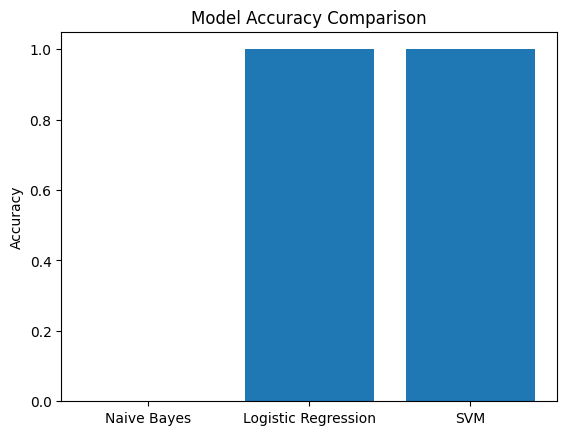

Based on the evaluation metrics, we can determine which model performs the best in predicting movie genres based on plot summaries.


In [16]:
# Compare the models
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracy_scores = [accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_log_reg),
                   accuracy_score(y_test, y_pred_svm)]

# Plot the results
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(models, accuracy_scores)
ax.set_title('Model Accuracy Comparison')
ax.set_ylabel('Accuracy')
plt.show()

# Conclusion
print("Based on the evaluation metrics, we can determine which model performs the best in predicting movie genres based on plot summaries.")
